In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats

## THE UNIFORM DISTRIBUTION

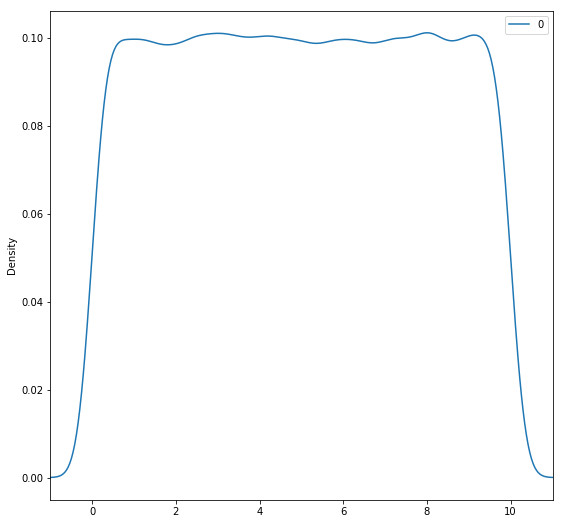

In [17]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10
# Plot the distribution - UNIFORM
pd.DataFrame(uniform_data).plot(kind="density", figsize=(9,9), xlim=(-1,11))

#The area under a probability density curve is always equal to 1.
#print(stats.distributions.rv_continuous.rvs(uniform_data))
#generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).



In [18]:
# cumulative distribution function
#stats.distributions.cdf()
# is used to determine the probability that an observation drawn from a distribution falls below a specified value
# In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis.
# For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end
#>>> 0.25

0.25

In [19]:
#Percent Point Function 
#stats.distributions.ppf()
#is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end
#>>> 4.0     

4.0

In [20]:
#Probability density function
#stats.distributions.pdf() 
#gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) ) 

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


## GENERATING RANDOM NUMBERS AND SETTING THE SEED

In [0]:
import random

In [25]:
print(random.randint(0,10))    # Get a random integer in the specified range

print(random.choice([2,4,6,9])) # Get a random element from a sequence

print(random.random())          # Get a real number between 0 and 1 

random.seed(12)  # Set the seed to an arbitrary value
print([random.uniform(0,10) for x in range(4)])
random.seed(12)  # Set the seed to the same value
print([random.uniform(0,10) for x in range(4)])

6
9
0.9719241638163123
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


## THE NORMAL or GAUSSIAN DISTRIBUTION

In [26]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)
#The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule.

0.15865525393145707 0.15865525393145707 0.6826894921370859


Text(1.4, 0.03, '0.159')

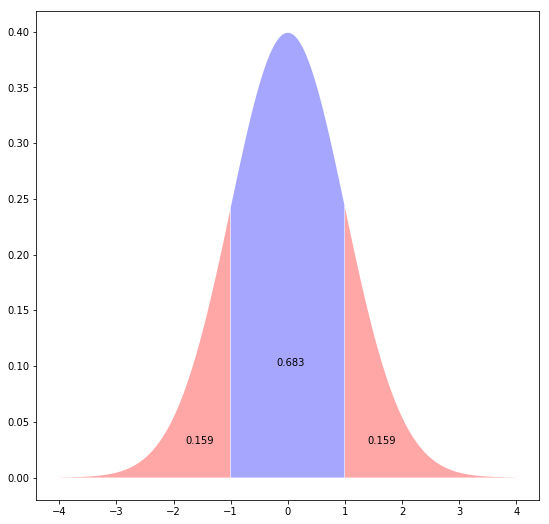

In [27]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

In [28]:
#Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

#The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.
# *Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution.

-1.9599639845400545
1.959963984540054


## BINOMIAL DISTRIBUTIOn

[5 4 7 ... 7 2 8]
col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   9  91  430  1148  2072  2418  2084  1214  434  95   5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c82249a90>]],
      dtype=object)

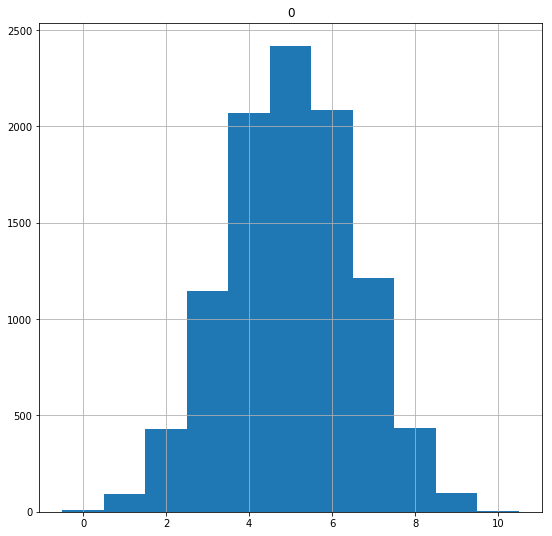

In [34]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials
print(fair_coin_flips)
print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  12  64  288  883  2005  2998  2656  1094


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c82689b00>]],
      dtype=object)

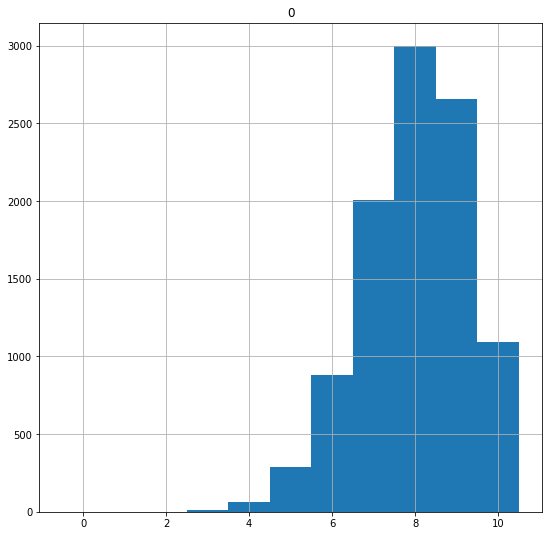

In [35]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability 0.8
                                  size=10000)  # Number of trials
# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))
# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

In [37]:
print(stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8))     # And success probability 0.8
#>>>0.032793497599999964

1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8
#>>>0.37580963840000003

0.032793497599999964


0.37580963840000003

In [38]:
print(stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5) )     # And success probability 0.5
#>>>0.24609375000000025

stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8
#>>>0.30198988799999998   

0.24609375000000025


0.301989888

## THE GEOMETRIC AND EXPONENTIAL DISTRIBUTIONS

col_0     1     2     3    4    5    6   7   8   9   10  11  12  14  16  20
row_0                                                                      
counts  5029  2458  1279  615  329  144  71  35  15  10   9   2   2   1   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c825dfa90>]],
      dtype=object)

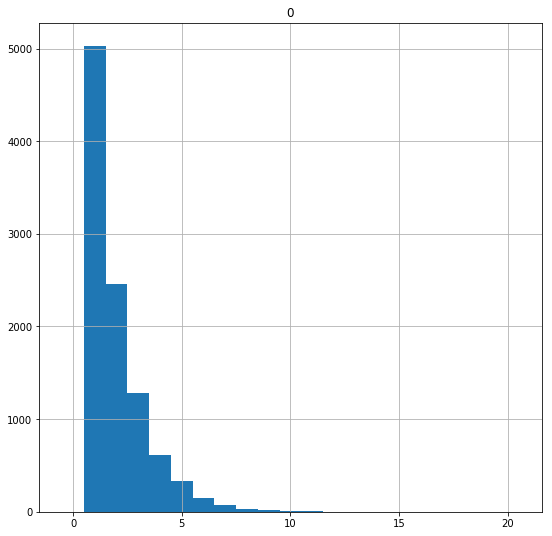

In [39]:
#Let's use the geom functions to model the number of trials it takes to get a success (heads) when flipping a fair coin:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)

In [40]:
#Let's use cdf() to check the probability of needing 6 flips or more to get a success:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

In [41]:
#Use pmf() to check the probability of seeing a specific number of flips before a successes:

stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

In [43]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

Text(1.5, 0.08, '0.368')

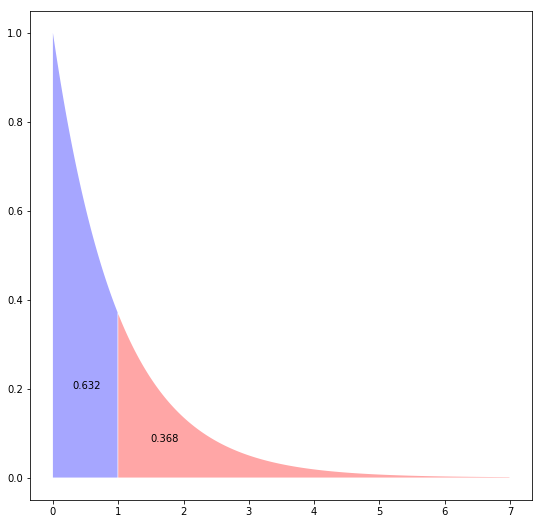

In [44]:
#Let's plot this exponential distribution to get an idea of its shape:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3))

## POISSON DISTRIBUTIONS

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3736  3650  1850  573  154  30  5  2
col_0   0   1   2   3    4    5    6    7   ...   16   17  18  19  20  21  22  23
row_0                                       ...                                  
counts   3   2  22  59  211  366  671  917  ...  210  132  73  36  13  10   5   3

[1 rows x 24 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c8205b828>]],
      dtype=object)

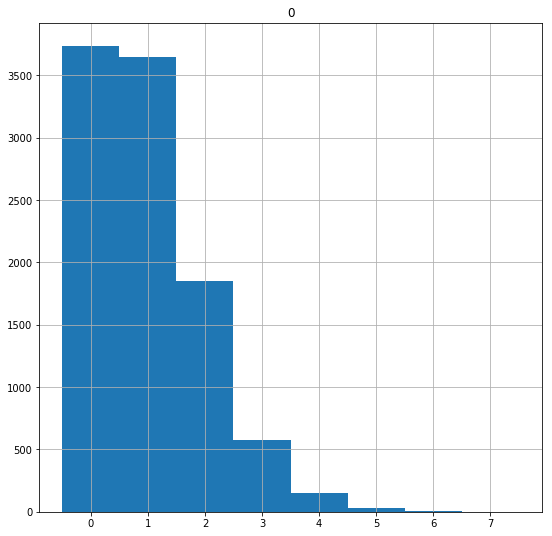

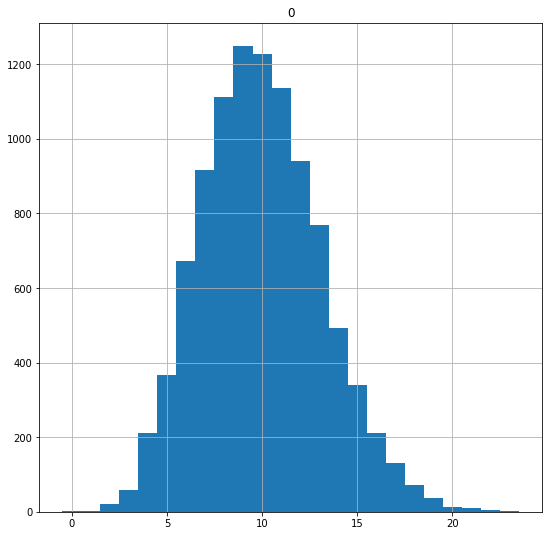

In [45]:
random.seed(12)
arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1
# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))
# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1)


random.seed(12)
arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10
# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))
# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1)

In [46]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10


0.06708596287903189

In [47]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372